In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
data = pd.read_csv("Breast cancer data(1).csv")
data.head(10)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0
8,13.00,21.82,87.50,519.8,0.12730,0
9,12.46,24.04,83.97,475.9,0.11860,0


<Axes: >

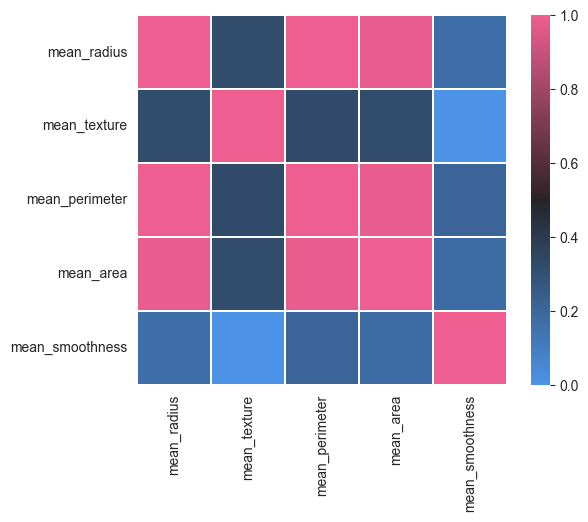

In [9]:
corr = data.iloc[:,:-1].corr(method='pearson')
cmap = sns.diverging_palette(250,354,80,60,center='dark', as_cmap=True)
sns.heatmap(corr,vmax=1,vmin=0,cmap=cmap,square=True,linewidths=.2)

In [10]:
data = data[["mean_radius","mean_texture","mean_smoothness","diagnosis"]]
data.head(10)

,mean_radius,mean_texture,mean_smoothness,diagnosis
0,17.99,10.38,0.11840,0
1,20.57,17.77,0.08474,0
2,19.69,21.25,0.10960,0
3,11.42,20.38,0.14250,0
4,20.29,14.34,0.10030,0
5,12.45,15.70,0.12780,0
6,18.25,19.98,0.09463,0
7,13.71,20.83,0.11890,0
8,13.00,21.82,0.12730,0
9,12.46,24.04,0.11860,0


<Axes: xlabel='mean_texture', ylabel='Count'>

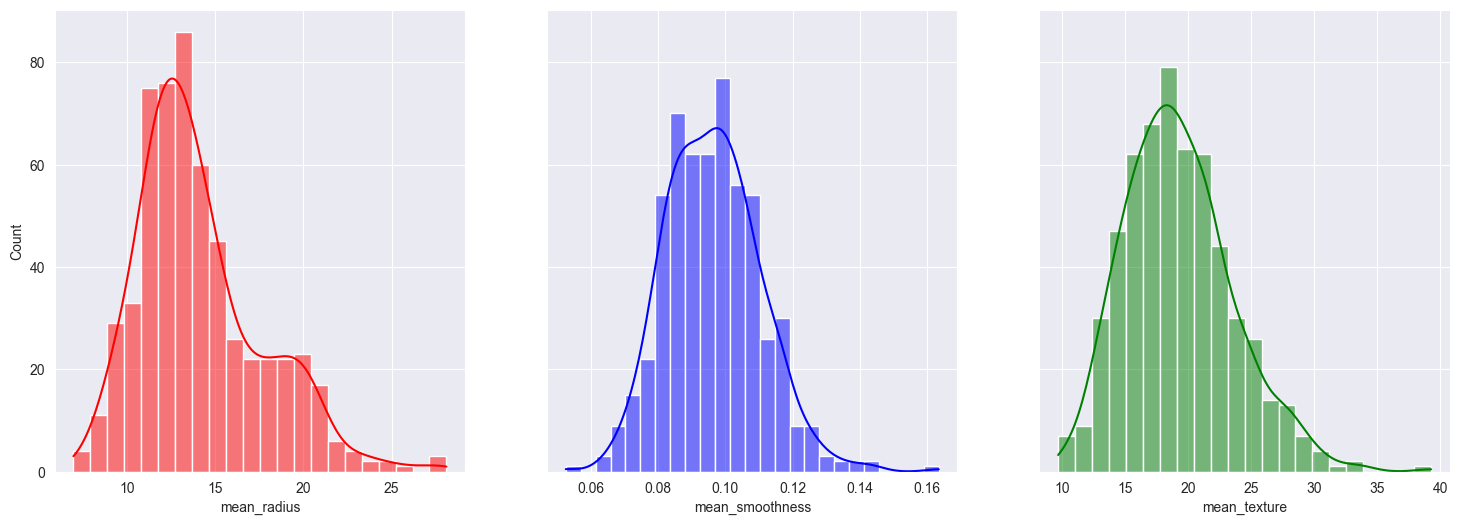

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(data, ax=axes[0], x="mean_radius", kde=True, color='r')
sns.histplot(data, ax=axes[1], x="mean_smoothness", kde=True, color='b')
sns.histplot(data, ax=axes[2], x="mean_texture", kde=True, color='g')


In [13]:
def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y] == i])/len(df))
    return prior

In [15]:
def calculate_likelyhood_gaussian(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y] == label]
    mean, std = df[feat_name].mean(), df[feat_name].std()
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-((feat_val-mean)**2 / (2 * std**2)))
    return p_x_given_y

In [19]:
def naive_bayes_gaussian(df,X,Y):
    # Get feature names
    features = list(df.columns)[:-1]

    # Calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # Loop through data
    for x in X:
        # Calculate likelyhood
        labels = sorted(list(df[Y].unique()))
        likelyhood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelyhood[j] *= calculate_likelyhood_gaussian(df, features[i], x[i], Y, labels[j])

        # Calculate posterior Probability
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelyhood[j] * prior[j]
        
        # Predict the class
        Y_pred.append(np.argmax(post_prob))
    
    return np.array(Y_pred)

# Training and Testing the data

Test gaussian model

In [20]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_gaussian(train, X=X_test, Y="diagnosis")

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
print("Confusion Matrix: \n", confusion_matrix(Y_test, Y_pred))
print("Accuracy: ", accuracy_score(Y_test, Y_pred))
print("F1 Score: ", f1_score(Y_test, Y_pred))

Confusion Matrix: 
 [[36  4]
 [ 0 74]]
Accuracy:  0.9649122807017544
F1 Score:  0.9736842105263158


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.2, random_state=41)

gnb = GaussianNB()
gnb.fit(X_train, Y_train)

Y_pred = gnb.predict(X_test)

print("Confusion Matrix: \n", confusion_matrix(Y_test, Y_pred))
print("Accuracy: ", accuracy_score(Y_test, Y_pred))
print("F1 Score: ", f1_score(Y_test, Y_pred, average='binary'))

Confusion Matrix: 
 [[36  4]
 [ 0 74]]
Accuracy:  0.9649122807017544
F1 Score:  0.9736842105263158


2. Naive_bayes_categorical

In [21]:
def calculate_likelyhood_categorical(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y] == label]
    p_x_given_y = len(df[df[feat_name] == feat_val])/len(df)
    return p_x_given_y

In [22]:
def naive_bayes_categorical(df,X,Y):
    # Get feature names
    features = list(df.columns)[:-1]

    # Calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # Loop through data
    for x in X:
        # Calculate likelyhood
        labels = sorted(list(df[Y].unique()))
        likelyhood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelyhood[j] *= calculate_likelyhood_categorical(df, features[i], x[i], Y, labels[j])

        # Calculate posterior Probability
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelyhood[j] * prior[j]
        
        # Predict the class
        Y_pred.append(np.argmax(post_prob))
    
    return np.array(Y_pred)

In [23]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_categorical(train, X=X_test, Y="diagnosis")

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
print("Confusion Matrix: \n", confusion_matrix(Y_test, Y_pred))
print("Accuracy: ", accuracy_score(Y_test, Y_pred))
print("F1 Score: ", f1_score(Y_test, Y_pred))

Confusion Matrix: 
 [[40  0]
 [73  1]]
Accuracy:  0.35964912280701755
F1 Score:  0.026666666666666665
